In [1]:
import numpy as np
np.random.seed(7)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)

(60000, 28, 28)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #normalize 0-1
X_test /= 255
print(X_train.shape)

(60000, 784)


In [5]:
print (y_train.shape)

(60000,)


In [6]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
print (Y_train.shape)

(60000, 10)


In [8]:
model = Sequential()
model.add(Dense(784, activation = 'relu',input_shape=(784,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [10]:
info = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.5402 - acc: 0.8619 - val_loss: 0.2940 - val_acc: 0.9164
Epoch 2/10
60000/60000 [==============================] - 24s 408us/step - loss: 0.2667 - acc: 0.9234 - val_loss: 0.2316 - val_acc: 0.9368
Epoch 3/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.2153 - acc: 0.9384 - val_loss: 0.1887 - val_acc: 0.9461
Epoch 4/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.1806 - acc: 0.9486 - val_loss: 0.1669 - val_acc: 0.9520
Epoch 5/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.1549 - acc: 0.9567 - val_loss: 0.1476 - val_acc: 0.9563
Epoch 6/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.1354 - acc: 0.9619 - val_loss: 0.1345 - val_acc: 0.9598
Epoch 7/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.1197 - acc: 0.9666 - val_loss: 0.

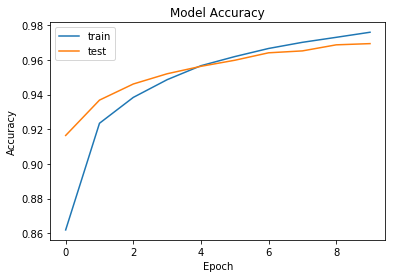

In [12]:
#print(info.history.keys())
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

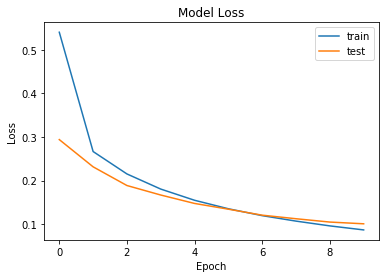

In [13]:
plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
score = model.evaluate(X_test, Y_test, verbose=1)
print ("Test Accuracy: ",score[1]*100)

10000/10000 [==============================] - 1s 120us/step
Test Accuracy:  96.94


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________
